In [1]:
from netpyne import specs, sim
netParams = specs.NetParams()
simConfig = specs.SimConfig()

## Creating a cell model for a single cell


In [2]:
netParams.cellParams['pyr'] = {}
netParams.cellParams['pyr']['secs'] = {}

### Specify the soma compartment properties and the geometries of cell in dictionaries

 

In [3]:
netParams.cellParams['pyr']['secs']['soma'] = {}

In [4]:
netParams.cellParams['pyr']['secs']['soma']['geom'] = {
    "diam": 12,
    "L": 12,
    "Ra": 100.0,
    "cm": 1
    }

In [5]:
netParams.cellParams['pyr']['secs']['soma']['mechs'] = {"hh": {
    "gnabar": 0.12,
    "gkbar": 0.036,
    "gl": 0.0003,
    "el": -54.3
    }}

In [6]:
dend = {}

In [7]:
dend['geom'] = {"diam": 1.0,
                "L": 200.0,
                "Ra": 100.0,
                "cm": 1,
               }

In [8]:
dend['mechs'] = {"pas": 
                    {"g": 0.001,
                     "e": -70}
                }

In [9]:
dend['topol'] = {"parentSec": "soma",
                 "parentX": 1.0,
                 "childX": 0,
                }

In [10]:
netParams.cellParams['pyr']['secs']['dend'] = dend

## Create a population of cells from this one cell model like a synapse model connected together.



In [11]:
netParams.popParams['E'] = {
    "cellType": "pyr",
    "numCells": 40,
}

In [12]:
netParams.synMechParams['exc'] = {
    "mod": "Exp2Syn",
    "tau1": 0.1,
    "tau2": 1.0,
    "e": 0
}

In [13]:
netParams.connParams['E->E'] = {
    "preConds": {"pop": "E"},
    "postConds": {"pop": "E"},
    "weight": 0.005,
    "probability": 0.1,
    "delay": 5.0,
    "synMech": "exc",
    "sec": "dend",
    "loc": 1.0,
}

## Setting up the simulation configuration to visualize

In [14]:
simConfig.filename = "netpyne_tut1"
simConfig.duration = 100.0
simConfig.dt = 0.1

In [17]:
simConfig.recordCells = [0]
simConfig.recordTraces = {
    "V_soma": {
        "sec": "soma",
        "loc": 0.5,
        "var": "v",
    },
    "V_dend": {
        "sec": "dend",
        "loc": 1.0,
        "var": "v",
    }
}

In [18]:
simConfig.analysis = {
    "plotTraces": {
        "include": [0],
        "saveFig": True,
    },
    "plotRaster": {
        "saveFig": True,
    }
}

In [19]:
%matplotlib inline


Start time:  2021-04-02 01:00:05.889123

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.15 s.
Making connections...
  Number of connections on node 0: 161 
  Done; cell connection time = 0.05 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 2 traces of 2 types on node 0

Running simulation for 100.0 ms...
  Done; run time = 0.05 s; real-time ratio: 2.17.

Gathering data...
  Done; gather time = 0.03 s.

Analyzing...
  Cells: 40
  Connections: 161 (4.03 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 0.1 s; 1 workers
  Run time: 0.05 s
  Done; saving time = 0.07 s.
Plotting recorded cell traces ... cell


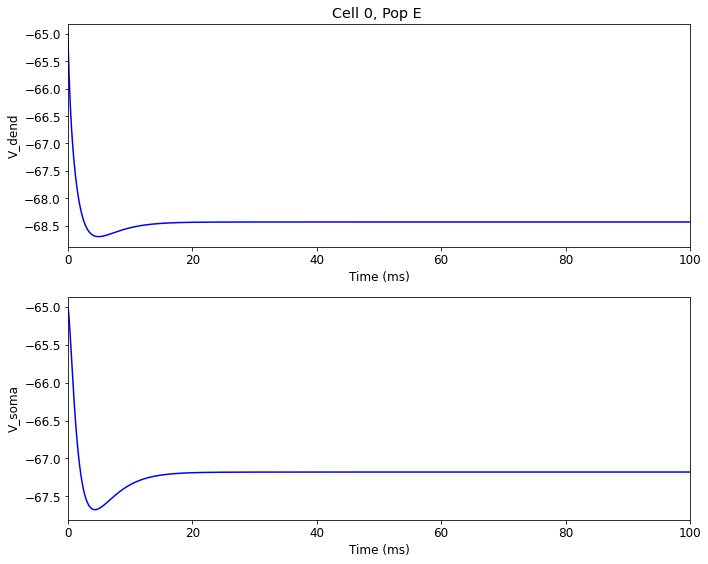

Plotting raster...
No spikes available to plot raster
  Done; plotting time = 1.22 s

Total time = 1.57 s

End time:  2021-04-02 01:00:07.459205


In [20]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

Plotting recorded cell traces ... cell


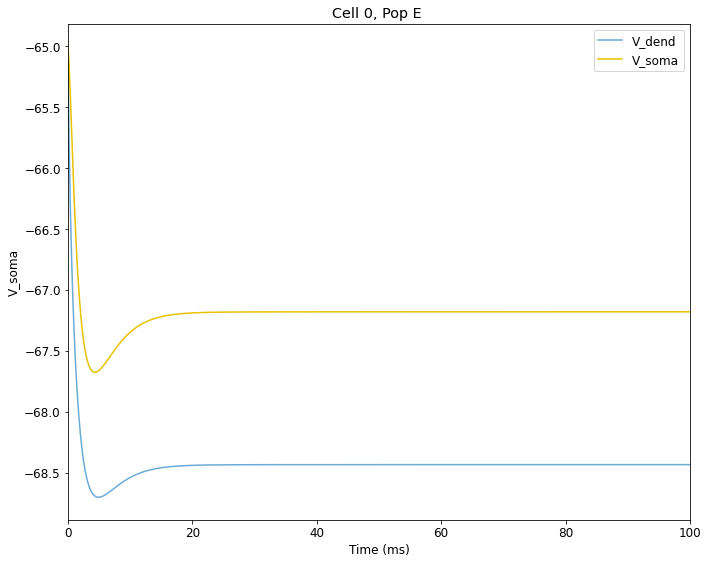

In [21]:
fig, figData = sim.analysis.plotTraces(overlay=True)